# KNN Regression


In [ ]:
import numpy as np
import pandas as pd


import pickle
with open('boston.pkl', 'rb') as file:
    boston = pickle.load(file)

boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
X=scaler.transform(X)

In [ ]:
X=X[y<50]
y=y[y<50]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)

In [ ]:
X_train.shape

(343, 12)

In [ ]:
#print(boston["DESCR"])

In [ ]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()

# n_neighbors: Number of neighbors
# weight: ‘uniform’ : uniform weights. ‘distance’ : weight points by the inverse of their distance.
# p Power parameter for the Minkowski metric.
# n_job:  number of parallel jobs to run (-1)

parameters = {'n_neighbors': np.arange(2, 20),
              'p': [1,2,3]}

#DEFINE YOUR GRIDSEARCH
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 0, scoring ='neg_mean_absolute_error')
#,https://scikit-learn.org/stable/modules/model_evaluation.html
#with no params it reduces to a CV
#'neg_mean_absolute_error',
#'neg_mean_squared_error'
# 'r2'

gs = gs.fit(X_train,y_train)



In [ ]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -2.627420 using {'n_neighbors': 3, 'p': 2}
-2.914227 (0.070039) with: {'n_neighbors': 2, 'p': 1}
-2.714071 (0.082360) with: {'n_neighbors': 2, 'p': 2}
-2.751341 (0.105433) with: {'n_neighbors': 2, 'p': 3}
-2.801105 (0.091079) with: {'n_neighbors': 3, 'p': 1}
-2.627420 (0.111178) with: {'n_neighbors': 3, 'p': 2}
-2.640940 (0.042764) with: {'n_neighbors': 3, 'p': 3}
-2.759645 (0.115299) with: {'n_neighbors': 4, 'p': 1}
-2.712530 (0.084067) with: {'n_neighbors': 4, 'p': 2}
-2.653949 (0.016923) with: {'n_neighbors': 4, 'p': 3}
-2.677974 (0.100344) with: {'n_neighbors': 5, 'p': 1}
-2.747133 (0.031636) with: {'n_neighbors': 5, 'p': 2}
-2.786333 (0.095039) with: {'n_neighbors': 5, 'p': 3}
-2.686287 (0.128281) with: {'n_neighbors': 6, 'p': 1}
-2.752932 (0.022740) with: {'n_neighbors': 6, 'p': 2}
-2.799056 (0.075479) with: {'n_neighbors': 6, 'p': 3}
-2.733083 (0.138210) with: {'n_neighbors': 7, 'p': 1}
-2.775696 (0.042261) with: {'n_neighbors': 7, 'p': 2}
-2

-2.6034013605442174

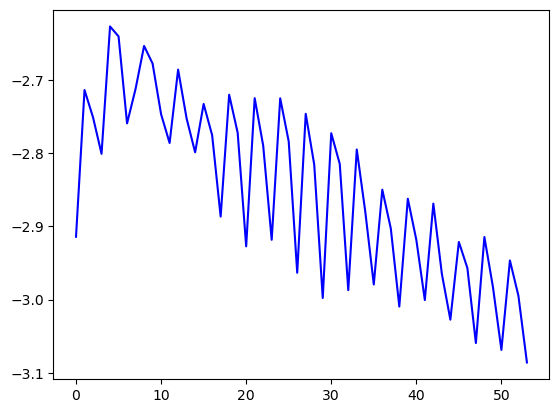

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

In [ ]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train)))
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  1.7703595724003889
MSE train:  6.5085228377065105
RMSE train:  2.551180675237744
r2:  0.9488719991432086
MAE test:  2.6034013605442174
MSE test:  11.656787603930459
RMSE test:  3.4142038023425694
r2:  0.8840013387732609


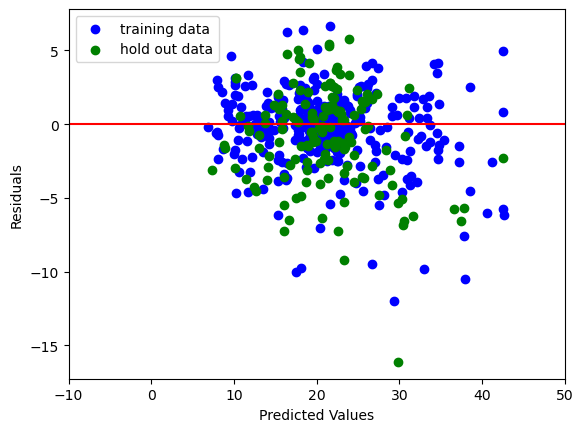

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()